<a href="https://colab.research.google.com/github/sravs0106hub/hackathon/blob/main/tiny_coders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import matplotlib.image as mpimg
import random
from sklearn import preprocessing
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Modified import
from tensorflow.keras.utils import to_categorical
import warnings

warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!unzip "/content/drive/MyDrive/archive (1)" -d /content/


unzip:  cannot find or open /content/drive/MyDrive/archive (1), /content/drive/MyDrive/archive (1).zip or /content/drive/MyDrive/archive (1).ZIP.


In [6]:
!unzip /content/Potato-Leaf-Disease-Classification-WebApp-main.zip -d /content/


unzip:  cannot find or open /content/Potato-Leaf-Disease-Classification-WebApp-main.zip, /content/Potato-Leaf-Disease-Classification-WebApp-main.zip.zip or /content/Potato-Leaf-Disease-Classification-WebApp-main.zip.ZIP.


In [9]:
import os

# Define the directory where the files were extracted
extracted_dir = '/content/Potato-Leaf-Disease-Classification-WebApp-main'  # Adjust this if needed

# Check if the directory exists before listing files
if os.path.isdir(extracted_dir):
    # List the contents of the extracted directory
    extracted_files = os.listdir(extracted_dir)

    # Print the list of files
    print("Files in the extracted directory:")
    print(extracted_files)

    # Check if the .h5 file exists
    model_file_name = 'final_model.h5'  # Adjust this name based on the actual model file
    if model_file_name in extracted_files:
        print(f"{model_file_name} exists in the extracted directory.")
    else:
        print(f"{model_file_name} does not exist in the extracted directory.")
else:
    print(f"The directory {extracted_dir} does not exist.")


The directory /content/Potato-Leaf-Disease-Classification-WebApp-main does not exist.


In [10]:
SIZE = 256
SEED_TRAINING = 121
SEED_TESTING = 197
SEED_VALIDATION = 164
CHANNELS = 3
n_classes = 3
EPOCHS = 50
BATCH_SIZE = 16
input_shape = (SIZE, SIZE, CHANNELS)

In [13]:
# Define the batch size
BATCH_SIZE = 32  # You can change this to your preferred batch size

# Augmentation configuration for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip=True,
        fill_mode='nearest')

# Augmentation configuration for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Augmentation configuration for testing
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        directory='/content/drive/MyDrive/dataset/potato_train',  # Input directory


        target_size=(256, 256),  # All images will be resized to 256x256
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        color_mode="rgb",
        shuffle=True,
        seed=65)

validation_generator = validation_datagen.flow_from_directory(
        directory='/content/drive/MyDrive/dataset/validationpotato',
        target_size=(256, 256),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        color_mode="rgb",
        shuffle=True,
        seed=76)

test_generator = test_datagen.flow_from_directory(
        directory='/content/drive/MyDrive/dataset/potato_test',
        target_size=(256, 256),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        color_mode="rgb",
        shuffle=False,
        seed=42)


Found 1214 images belonging to 3 classes.
Found 387 images belonging to 3 classes.
Found 215 images belonging to 3 classes.


In [14]:
model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
        keras.layers.MaxPooling2D((2, 2)),
        # keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        # keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        # keras.layers.BatchNormalization(),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        # keras.layers.BatchNormalization(),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Flatten(),
        keras.layers.Dense(32, activation ='relu'),
        keras.layers.Dense(n_classes, activation='softmax')
    ])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 127, 127, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 31, 31, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 15, 15, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,667 (725.26 KB)

 Trainable params: 185,667 (725.26 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics  = ['accuracy']
    )

In [17]:
print(train_generator.n)   # here .n will return no. of images used by generators
print(validation_generator.n)

1214
387


In [18]:
print(train_generator.batch_size)     # .batch_size will return the batch size
print(validation_generator.batch_size)

32
32


In [20]:
EPOCHS = 5 # Set the number of epochs

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)


Epoch 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 294s 8s/step - accuracy: 0.5966 - loss: 0.8531 - val_accuracy: 0.6380 - val_loss: 0.8510
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4688 - loss: 1.0374 - val_accuracy: 0.6667 - val_loss: 0.9644
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 257s 6s/step - accuracy: 0.6648 - loss: 0.6733 - val_accuracy: 0.6406 - val_loss: 0.9251
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5938 - loss: 0.9131 - val_accuracy: 0.3333 - val_loss: 1.0471
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 225s 6s/step - accuracy: 0.7332 - loss: 0.5968 - val_accuracy: 0.7812 - val_loss: 0.5143


In [21]:
score = model.evaluate(test_generator)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])


7/7 ━━━━━━━━━━━━━━━━━━━━ 30s 5s/step - accuracy: 0.7472 - loss: 0.5589
Test loss :  0.5261240005493164
Test accuracy :  0.7953488230705261


In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

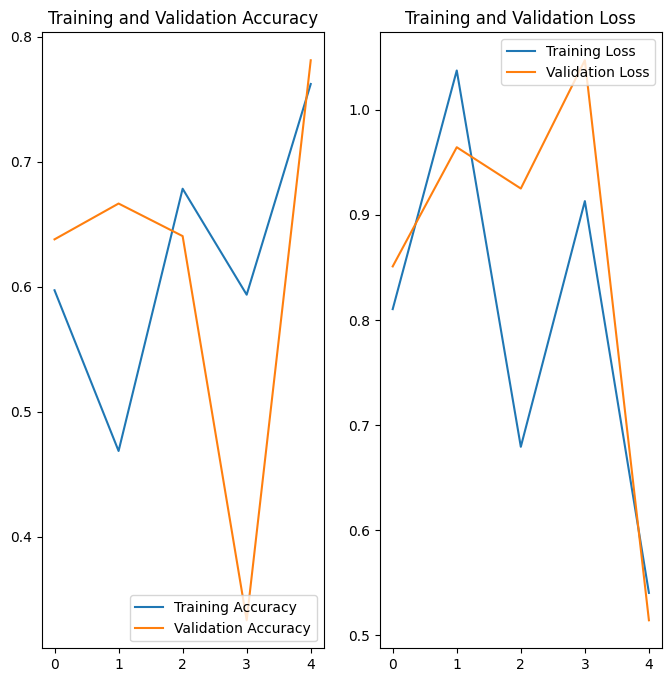

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

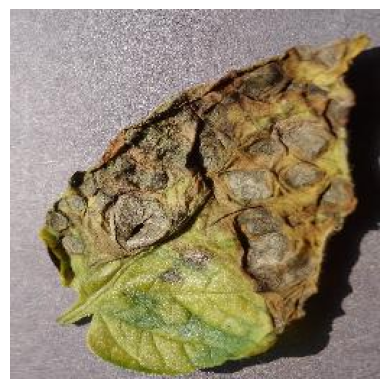

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Predicted Class :  early_blight
Actual Class :  early_blight
Confidence :  47.52 %
_____________________________________________________________


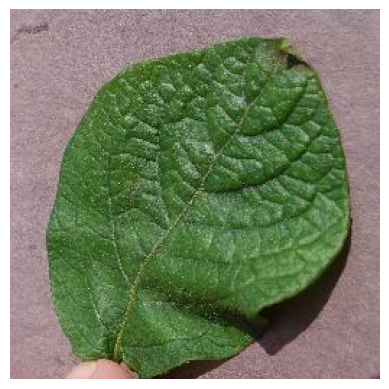

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Class :  late-blight
Actual Class :  healthy
Confidence :  35.0 %
_____________________________________________________________


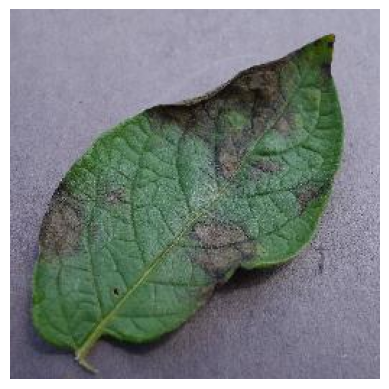

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Class :  late-blight
Actual Class :  late-blight
Confidence :  35.04 %
_____________________________________________________________


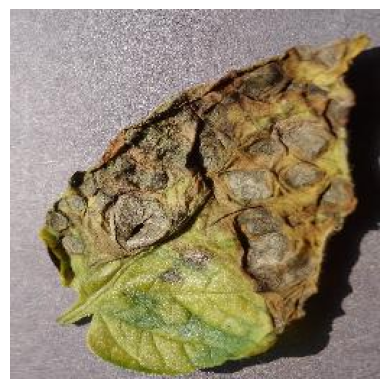

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted Class :  early_blight
Actual Class :  early_blight
Confidence :  47.52 %
_____________________________________________________________


In [29]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

def load_image(img_path, show = False) :
    img = image.load_img(img_path, target_size = (256, 256))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis = 0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show :
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor

def get_labels(test_path) :
    # getting class labels
    from glob import glob

    class_names = []
    test_path = test_path + '/*'
    for i in glob(test_path) :  # Reads all the folders in which images are present
        class_names.append(i.split('/')[-1])

    # return dict(zip(class_names, range(len(class_names))))    # return dictionary containing class name and numeric label.
    return sorted(class_names)

if __name__ == "__main__":
    # load model
    model = load_model("/content/drive/MyDrive/final_model1.h5", compile = False)

    # image path
    img1 = '/content/drive/MyDrive/dataset/potato_test/early_blight/0e6b9e09-2bcd-41e0-b001-b80a33a8a78b___RS_Early.B 8694.JPG'
    img2 = '/content/drive/MyDrive/dataset/potato_test/healthy/7948ada9-eabc-4cb7-a579-b73e938eb716___RS_HL 4185.JPG'
    img3 = '/content/drive/MyDrive/dataset/potato_test/late-blight/25978f86-dca7-4052-bf6b-7d14ce0438ad___RS_LB 5016.JPG'
    img4 = '/content/drive/MyDrive/dataset/potato_test/early_blight/0e6b9e09-2bcd-41e0-b001-b80a33a8a78b___RS_Early.B 8694.JPG'
    class_names = get_labels('/content/drive/MyDrive/dataset/potato_test')
    for i in [img1, img2, img3, img4] :
        new_image = load_image(i, show = True)
        y_proba = model.predict(new_image)
        confidence = round(100 * (np.max(y_proba[0])), 2)
        print('Predicted Class : ', class_names[np.argmax(y_proba)])
        print('Actual Class : ', i.split('/')[-2])
        print('Confidence : ', confidence, '%')
        print('_____________________________________________________________')
